# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = np.array([x[1] for x in all_molecules[:num_train]])

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = np.array([x[1] for x in all_molecules[num_train:]])

In [3]:
for i in range(len(x_train)):
  x_train[i].append(1)
for i in range(len(x_test)):
  x_test[i].append(1)
x_test = np.array(x_test)
x_train = np.array(x_train)

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.



Using a random w initially and a random learning rate. Cost function defined J(w) = (1/2m)Σ((y_pred - y_train)^2). Updating to new w with every itteration using following equation,\
**w_new = w - (learning rate)(J'(w))**\
Learning rate should be decided optimally by observing the data. Lower learning rates may take so much computation to reach the minima. Conversely if the learning rate was too high this may make the w_new calculation too volatile moving away from the minima in every itteration.

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [4]:
# implement Linear Regression
def Cost_function(w_tmp):
  y_pred = []
  for i in range(len(x_train)):
    y_pred.append(np.array(x_train[i]).dot(w_tmp))
  y_pred = np.array(y_pred)
  y_pred = y_pred - y_train
  y_pred = y_pred**2
  return (np.sum(y_pred))/(2*len(x_train))

def differ(w_tmp):
  y_pred = []
  for i in range(len(x_train)):
    x_tmp = x_train[i]
    y_pred.append(np.array(x_tmp).dot(w_tmp))
  y_pred = np.array(y_pred)
  y_pred = y_pred - y_train
  tmp = []
  for i in range(len(x_train)):
    tmp.append(list(x_train[i] * y_pred[i]))
  tmp = np.array(tmp)
  tmp = np.add.reduce(tmp)
  return (tmp/len(x_train))

w = np.array([random.random() for i in range(5)])
l = 0.1
cost = []
w_new = []
w_new.append(list(np.array(w) - l*differ(w)))
for i in range(300):
  cost.append(Cost_function(np.array(w_new[-1])))
  w_new.append(list(np.array(w_new[-1]) - l*differ(w_new[-1])))

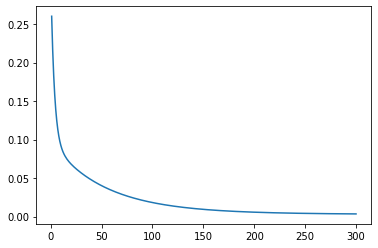

In [5]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, 301)], cost)

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

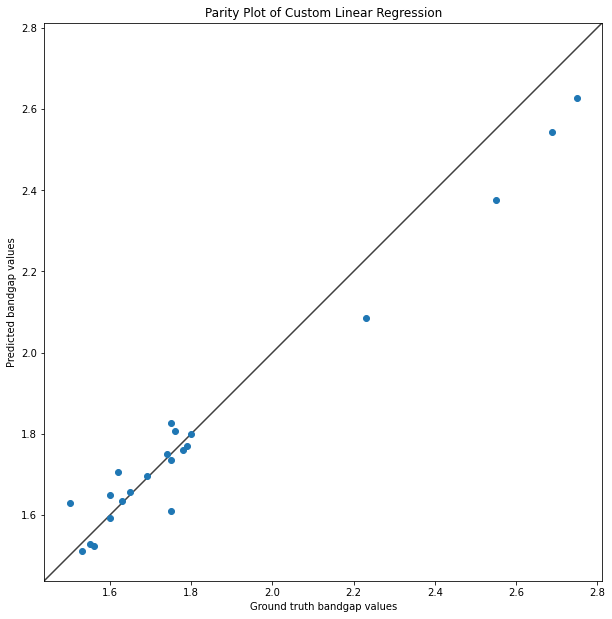

In [6]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

fig, ax = plt.subplots(figsize=(10,20))
y_pred = list()
for i in range(len(x_test)):
  y_pred.append(np.array(x_test[i]).dot(w_new[-1]))
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

Ridge regression is a method for estimating the co-efficients of multiple regression models where linearly independent variables are highly correlated to each other.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [7]:
def Cost_function2(y_pred):
  y_pred = np.array(y_pred)
  y_pred = y_pred - y_test
  tmp = np.square(y_pred)
  return np.sum(tmp)/2*len(y_pred)

In [8]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
ridge_cost = []
ridge_score = []
x = [float(i/10) for i in range(1, 11)]
for i in range(1, 11):
  clf = Ridge(alpha=float(i/10))
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  #for i in range(len(x_test)):
    #y_pred.append(clf.predict(x_test[i]))
  ridge_cost.append(Cost_function2(y_predict))
  #print(ridge_cost)
  ridge_score.append(clf.score(x_test, y_test))
#plt.plot(x,ridge_cost)
#plt.plot(x,ridge_score)
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

In [10]:
from tabulate import tabulate
ridge_table = [((i+1)/10, ridge_cost[i]) for i in range(10)]
print(tabulate(ridge_table, headers=["Alpha", "Cost"]))

  Alpha     Cost
-------  -------
    0.1  1.24604
    0.2  1.32927
    0.3  1.42118
    0.4  1.52055
    0.5  1.62632
    0.6  1.73756
    0.7  1.85348
    0.8  1.97337
    0.9  2.09662
    1    2.2227


Text(0, 0.5, 'Cost')

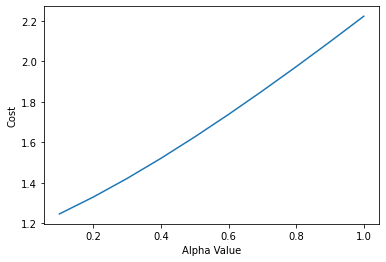

In [11]:
plt.plot(x,ridge_cost)
plt.xlabel('Alpha Value')
plt.ylabel('Cost')

Text(0, 0.5, 'Score')

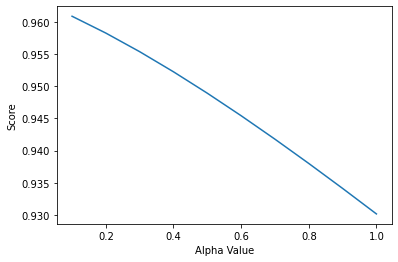

In [12]:
plt.plot(x,ridge_score)
plt.xlabel('Alpha Value')
plt.ylabel('Score')

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso is so similar to ridge whereas uses shrinkage. Shrinkage is process where the values are shrunk towards a central point like mean. For example ridge considers every linearly independent variable even with very small values ( ~ 0). Where as lasso smothens these by shrunking them to 0.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [ ]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [13]:
from sklearn.linear_model import Lasso
lasso_score = []
lasso_cost = []
for i in range(20):
  lasso_function = Lasso(alpha=(i/200))
  lasso_function.fit(x_train,y_train)
  y_predict = lasso_function.predict(x_test)
  lasso_cost.append(Cost_function2(y_predict))
  #print(cost)
  lasso_score.append(lasso_function.score(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e-01, tolerance: 1.888e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [17]:
from tabulate import tabulate
lasso_table = [((i+1)/200, lasso_cost[i]) for i in range(20)]
print(tabulate(lasso_table, headers=["Alpha", "Cost"]))

  Alpha      Cost
-------  --------
  0.005   1.1729
  0.01    1.57285
  0.015   2.24559
  0.02    3.21283
  0.025   4.47458
  0.03    6.03083
  0.035   7.88158
  0.04   10.0268
  0.045  12.4666
  0.05   15.2009
  0.055  16.9564
  0.06   18.2967
  0.065  19.7311
  0.07   21.2597
  0.075  22.8824
  0.08   24.5992
  0.085  26.4102
  0.09   27.9594
  0.095  29.472
  0.1    31.0378


Text(0, 0.5, 'Cost')

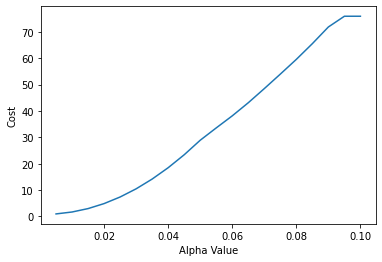

In [ ]:
plt.plot([(i+1)/200 for i in range(len(lasso_cost))],lasso_cost)
plt.xlabel('Alpha Value')
plt.ylabel('Cost')

Text(0, 0.5, 'Score')

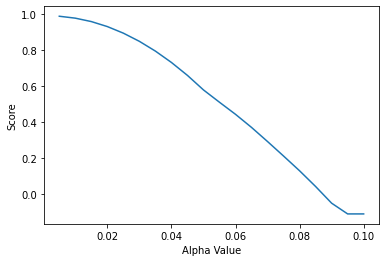

In [ ]:
plt.plot([(i+1)/200 for i in range(len(lasso_score))],lasso_score)
plt.xlabel('Alpha Value')
plt.ylabel('Score')